# 1. Research
---

## 1.1 Dataset

**Name and Source of the data:** [Mushroom Dataset](https://archive.ics.uci.edu/ml/datasets/Mushroom)

**Dataset obtained on:** 4th of November 2022.

**Reason:** I chose this dataset as I thought that learning to recognise different characteristics of mushrooms and find out whether one is poisonous or edible would be a skill that could come in handy in the future. The dataset was also more peculiar than my other picks, as it only deals with categorical data.

**Relevant information:** This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as
definitely edible, or definitely poisonous, and
not recommended.  This latter class was combined with the poisonous
one. Find its attributes below (from agaricus_lepiota.names):

    Attribute Information: (classes: edible=e, poisonous=p)  

     1. Cap shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s  
     2. Cap surface:              fibrous=f,grooves=g,scaly=y,smooth=s  
     3. Cap color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y  
     4. Bruises:                 bruises=t,no=f  
     5. Odour:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s  
     6. Gill attachment:          attached=a,descending=d,free=f,notched=n  
     7. Gill spacing:             close=c,crowded=w,distant=d
     8. Gill size:                broad=b,narrow=n
     9. Gill color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. Stalk shape:              enlarging=e,tapering=t
    11. Stalk root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. Stalk surface above ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. Stalk surface below ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. Stalk color above ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. Stalk color below ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. Veil type:                partial=p,universal=u
    17. Veil color:               brown=n,orange=o,white=w,yellow=y
    18. Ring number:              none=n,one=o,two=t
    19. Ring type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. Spore print color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. Population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. Habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d


# 2. Research - Overview - Objectives
---

## 2.1 Dataset Overview

This dataset contains data for 23 different species of mushrooms that belong to the Agaricus and Lepiota Family. Each mushroom has been identified as **edible** or **poisonous**. The aim of this notebook is to create a predictive model based on this dataset that will be able to predict a mushroom's edibility or poisonousness.

## 2.2 Dataset Objectives

The main objective is to identify the most appropriate algorithms that need to be trained in order to predict the target values correctly.  

To do so, the steps would be:
* Exploring the data to see if there are any helpful insights about the correlation among each mushroom's characteristic.
* If required, pre-processing the dataset to visualise or prepare for machine learning. 
* Analysing and comparing the results if multiple solutions are applied.
* If possible or appropriate, improve the model by tweaking the algorithms' parameters.
* Time permitting, deploying the solution using Streamlit.

## 2.3 Related Peer Reviewed Paper


**Link:** [Random forest as a generic framework for predictive modeling of spatial and spatio-temporal variables](https://peerj.com/articles/5518/)  
**GitHub implementation:** [GeoMLA (RFsp — Random Forest for spatial data)](https://github.com/thengl/GeoMLA)

To support one of the models used in this Notebook (Random Forest), I chose to review a paper that takes geo-spatial variables into account when training a model. Considering the distance between the populations of mushrooms would have been a good addition to this dataset.

This paper proposes a Random Forest framework to support the modelling of geographical spatial correlations. These are typically auto-correlated by the algorithms and are, therefore, often biased. The paper's authors added a buffer distance (between observation points) and used it as a considered variable rather than letting the algorithm assume the correlation.

This solution is deployed as an R (programming language) package, which is also used for statistical computing.

In their research, the authors are comparing a geostatistical model's results, with their RFsp package's, as they are mapping Zinc concentration in soil. Their results show that taking into consideration the buffer distances between two points and feeding them to the algorithm causes their Random Forest model to be more accurate than geostatistical kriging (a type of linear estimation that is used to predict a certain variable based on the space around it).


# 3. Data Exploration
---

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Import dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')

# Increase the total number of possible visible columns
from google.colab.data_table import DataTable
DataTable.max_columns = 116 # 23

# Adding column names
df.columns = ['Class', 'Cap shape', 'Cap surface', 'Cap colour', 'Bruises', 'Odour', 'Gill attachment', 'Gill spacing', 'Gill size',
              'Gill colour', 'Stalk shape', 'Stalk root', 'Stalk surface above ring', 'Stalk surface below ring', 'Stalk colour above ring',
              'Stalk colour below ring', 'Veil type', 'Veil colour', 'Ring number', 'Ring type', 'Spore print colour', 'Population', 'Habitat']

df.head()

,Class,Cap shape,Cap surface,Cap colour,Bruises,Odour,Gill attachment,Gill spacing,Gill size,Gill colour,...,Stalk surface below ring,Stalk colour above ring,Stalk colour below ring,Veil type,Veil colour,Ring number,Ring type,Spore print colour,Population,Habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [ ]:
# Used this to check whether df is balanced
df["Class"].value_counts()

e    4208
p    3915
Name: Class, dtype: int64

## 3.1 Is this dataset balanced?
The data exploration clearly indicates that the data is very balanced. The number of edible mushrooms accounts for 52% of the data, so there is no need for resampling.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


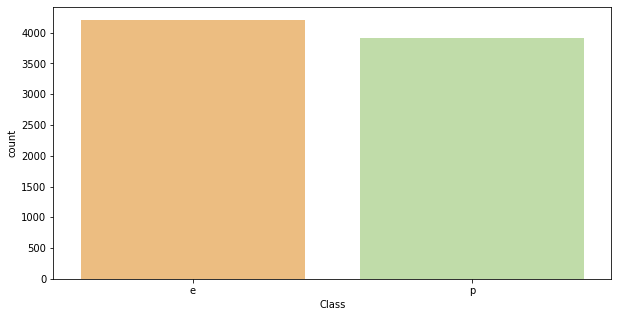

In [ ]:
# Visualize dataset's target value
plt.figure(figsize=(10, 5))
sns.countplot(df['Class'], palette="Spectral")
plt.show()

In [ ]:
# number of records with 'e' label
n_edible = df[df['Class'] == 'e'].shape[0]

# number of records with 'p' label
n_poisonous = df[df['Class'] == 'p'].shape[0]

# print percentage of both examples
print(f'There is {n_edible} examples with e label, which is {round(n_edible/df.shape[0],2)*100}%')
print(f'There is {n_poisonous} examples with p label, which is {round(n_poisonous/df.shape[0],2)*100}%')

There is 4208 examples with e label, which is 52.0%
There is 3915 examples with p label, which is 48.0%


## 3.2 Unique values - Frequency - Shape

Applying the describe method to a categorical dataframe, shows the number of unique values per feature, along with its most frequent value.

From the data observed so far it can be gathered hat:
* The data is simply displaying a character, so it is not very readable, it needs to be changed for proper visualisation
* Some variables

In [ ]:
df.describe()

,Class,Cap shape,Cap surface,Cap colour,Bruises,Odour,Gill attachment,Gill spacing,Gill size,Gill colour,...,Stalk surface below ring,Stalk colour above ring,Stalk colour below ring,Veil type,Veil colour,Ring number,Ring type,Spore print colour,Population,Habitat
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,...,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3655,3244,2283,4748,3528,7913,6811,5612,1728,...,4935,4463,4383,8123,7923,7487,3967,2388,4040,3148


* The dataset contains 8123 rows and 23 columns

In [ ]:
df.shape

(8123, 23)

The info method confirms that all the values are categorical, and there are no null values. There are, however, values marked as 'missing' in the `Stalk root` column (the ? values appear as 'missing' in the charts).

In [ ]:
df[df == '?'].count()

Class                          0
Cap shape                      0
Cap surface                    0
Cap colour                     0
Bruises                        0
Odour                          0
Gill attachment                0
Gill spacing                   0
Gill size                      0
Gill colour                    0
Stalk shape                    0
Stalk root                  2480
Stalk surface above ring       0
Stalk surface below ring       0
Stalk colour above ring        0
Stalk colour below ring        0
Veil type                      0
Veil colour                    0
Ring number                    0
Ring type                      0
Spore print colour             0
Population                     0
Habitat                        0
dtype: int64

Checking that there are no null values, and the type of each column's features.

In [ ]:
df.info() # Shows that there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Class                     8123 non-null   object
 1   Cap shape                 8123 non-null   object
 2   Cap surface               8123 non-null   object
 3   Cap colour                8123 non-null   object
 4   Bruises                   8123 non-null   object
 5   Odour                     8123 non-null   object
 6   Gill attachment           8123 non-null   object
 7   Gill spacing              8123 non-null   object
 8   Gill size                 8123 non-null   object
 9   Gill colour               8123 non-null   object
 10  Stalk shape               8123 non-null   object
 11  Stalk root                8123 non-null   object
 12  Stalk surface above ring  8123 non-null   object
 13  Stalk surface below ring  8123 non-null   object
 14  Stalk colour above ring 

## 3.3 First pre-processing so the data can be clearly visualised
Big helper code snippet. It takes the features and it changes them to full words, so there is no need for a legend or context switching to remember what a character means. 

In [ ]:
def change_to_words(data):
  # change the values of the data to full words
  data['Class'] = data['Class'].replace('e', 'edible')
  data['Class'] = data['Class'].replace('p', 'poisonous')
  data['Cap shape'] = data['Cap shape'].replace('b', 'bell')
  data['Cap shape'] = data['Cap shape'].replace('c', 'conical')
  data['Cap shape'] = data['Cap shape'].replace('x', 'convex')
  data['Cap shape'] = data['Cap shape'].replace('f', 'flat')
  data['Cap shape'] = data['Cap shape'].replace('k', 'knobbed')
  data['Cap shape'] = data['Cap shape'].replace('s', 'sunken')
  data['Cap surface'] = data['Cap surface'].replace('f', 'fibrous')
  data['Cap surface'] = data['Cap surface'].replace('g', 'grooves')
  data['Cap surface'] = data['Cap surface'].replace('y', 'scaly')
  data['Cap surface'] = data['Cap surface'].replace('s', 'smooth')
  data['Cap colour'] = data['Cap colour'].replace('n', 'brown')
  data['Cap colour'] = data['Cap colour'].replace('b', 'buff')
  data['Cap colour'] = data['Cap colour'].replace('c', 'cinnamon')
  data['Cap colour'] = data['Cap colour'].replace('g', 'gray')
  data['Cap colour'] = data['Cap colour'].replace('r', 'green')
  data['Cap colour'] = data['Cap colour'].replace('p', 'pink')
  data['Cap colour'] = data['Cap colour'].replace('u', 'purple')
  data['Cap colour'] = data['Cap colour'].replace('e', 'red')
  data['Cap colour'] = data['Cap colour'].replace('w', 'white')
  data['Cap colour'] = data['Cap colour'].replace('y', 'yellow')
  data['Bruises'] = data['Bruises'].replace('t', 'bruises')
  data['Bruises'] = data['Bruises'].replace('f', 'no')
  data['Odour'] = data['Odour'].replace('a', 'almond')
  data['Odour'] = data['Odour'].replace('l', 'anise')
  data['Odour'] = data['Odour'].replace('c', 'creosote')
  data['Odour'] = data['Odour'].replace('y', 'fishy')
  data['Odour'] = data['Odour'].replace('f', 'foul')
  data['Odour'] = data['Odour'].replace('m', 'musty')
  data['Odour'] = data['Odour'].replace('n', 'none')
  data['Odour'] = data['Odour'].replace('p', 'pungent')
  data['Odour'] = data['Odour'].replace('s', 'spicy')
  data['Gill attachment'] = data['Gill attachment'].replace('a', 'attached')
  data['Gill attachment'] = data['Gill attachment'].replace('d', 'descending')
  data['Gill attachment'] = data['Gill attachment'].replace('f', 'free')
  data['Gill spacing'] = data['Gill spacing'].replace('c', 'close')
  data['Gill spacing'] = data['Gill spacing'].replace('w', 'crowded')
  data['Gill spacing'] = data['Gill spacing'].replace('d', 'distant')
  data['Gill size'] = data['Gill size'].replace('b', 'broad')
  data['Gill size'] = data['Gill size'].replace('n', 'narrow')
  data['Gill colour'] = data['Gill colour'].replace('k', 'black')
  data['Gill colour'] = data['Gill colour'].replace('n', 'brown')
  data['Gill colour'] = data['Gill colour'].replace('b', 'buff')
  data['Gill colour'] = data['Gill colour'].replace('h', 'chocolate')
  data['Gill colour'] = data['Gill colour'].replace('g', 'gray')
  data['Gill colour'] = data['Gill colour'].replace('r', 'green')
  data['Gill colour'] = data['Gill colour'].replace('o', 'orange')
  data['Gill colour'] = data['Gill colour'].replace('p', 'pink')
  data['Gill colour'] = data['Gill colour'].replace('u', 'purple')
  data['Gill colour'] = data['Gill colour'].replace('e', 'red')
  data['Gill colour'] = data['Gill colour'].replace('w', 'white')
  data['Gill colour'] = data['Gill colour'].replace('y', 'yellow')
  data['Stalk shape'] = data['Stalk shape'].replace('e', 'enlarging')
  data['Stalk shape'] = data['Stalk shape'].replace('t', 'tapering')
  data['Stalk root'] = data['Stalk root'].replace('b', 'bulbous')
  data['Stalk root'] = data['Stalk root'].replace('c', 'club')
  data['Stalk root'] = data['Stalk root'].replace('u', 'cup')
  data['Stalk root'] = data['Stalk root'].replace('e', 'equal')
  data['Stalk root'] = data['Stalk root'].replace('z', 'rhizomorphs')
  data['Stalk root'] = data['Stalk root'].replace('r', 'rooted')
  data['Stalk root'] = data['Stalk root'].replace('?', 'missing')
  data['Stalk surface above ring'] = data['Stalk surface above ring'].replace('f', 'fibrous')
  data['Stalk surface above ring'] = data['Stalk surface above ring'].replace('y', 'scaly')
  data['Stalk surface above ring'] = data['Stalk surface above ring'].replace('k', 'silky')
  data['Stalk surface above ring'] = data['Stalk surface above ring'].replace('s', 'smooth')
  data['Stalk surface below ring'] = data['Stalk surface below ring'].replace('f', 'fibrous')
  data['Stalk surface below ring'] = data['Stalk surface below ring'].replace('y', 'scaly')
  data['Stalk surface below ring'] = data['Stalk surface below ring'].replace('k', 'silky')
  data['Stalk surface below ring'] = data['Stalk surface below ring'].replace('s', 'smooth')
  data['Stalk colour above ring'] = data['Stalk colour above ring'].replace('n', 'brown')
  data['Stalk colour above ring'] = data['Stalk colour above ring'].replace('b', 'buff')
  data['Stalk colour above ring'] = data['Stalk colour above ring'].replace('c', 'cinnamon')
  data['Stalk colour above ring'] = data['Stalk colour above ring'].replace('g', 'gray')
  data['Stalk colour above ring'] = data['Stalk colour above ring'].replace('o', 'orange')
  data['Stalk colour above ring'] = data['Stalk colour above ring'].replace('p', 'pink')
  data['Stalk colour above ring'] = data['Stalk colour above ring'].replace('e', 'red')
  data['Stalk colour above ring'] = data['Stalk colour above ring'].replace('w', 'white')
  data['Stalk colour above ring'] = data['Stalk colour above ring'].replace('y', 'yellow')
  data['Stalk colour below ring'] = data['Stalk colour below ring'].replace('n', 'brown')
  data['Stalk colour below ring'] = data['Stalk colour below ring'].replace('b', 'buff')
  data['Stalk colour below ring'] = data['Stalk colour below ring'].replace('c', 'cinnamon')
  data['Stalk colour below ring'] = data['Stalk colour below ring'].replace('g', 'gray')
  data['Stalk colour below ring'] = data['Stalk colour below ring'].replace('o', 'orange')
  data['Stalk colour below ring'] = data['Stalk colour below ring'].replace('p', 'pink')
  data['Stalk colour below ring'] = data['Stalk colour below ring'].replace('e', 'red')
  data['Stalk colour below ring'] = data['Stalk colour below ring'].replace('w', 'white')
  data['Stalk colour below ring'] = data['Stalk colour below ring'].replace('y', 'yellow')
  data['Veil type'] = data['Veil type'].replace('p', 'partial')
  data['Veil type'] = data['Veil type'].replace('u', 'universal')
  data['Veil colour'] = data['Veil colour'].replace('n', 'brown')
  data['Veil colour'] = data['Veil colour'].replace('o', 'orange')
  data['Veil colour'] = data['Veil colour'].replace('w', 'white')
  data['Veil colour'] = data['Veil colour'].replace('y', 'yellow')
  data['Ring number'] = data['Ring number'].replace('n', 'none')
  data['Ring number'] = data['Ring number'].replace('o', 'one')
  data['Ring number'] = data['Ring number'].replace('t', 'two')
  data['Ring type'] = data['Ring type'].replace('c', 'cobwebby')

  data['Ring type'] = data['Ring type'].replace('e', 'evanescent')
  data['Ring type'] = data['Ring type'].replace('f', 'flaring')
  data['Ring type'] = data['Ring type'].replace('l', 'large')
  data['Ring type'] = data['Ring type'].replace('n', 'none')
  data['Ring type'] = data['Ring type'].replace('p', 'pendant')
  data['Ring type'] = data['Ring type'].replace('s', 'sheathing')
  data['Ring type'] = data['Ring type'].replace('z', 'zone')
  data['Spore print colour'] = data['Spore print colour'].replace('k', 'black')
  data['Spore print colour'] = data['Spore print colour'].replace('n', 'brown')
  data['Spore print colour'] = data['Spore print colour'].replace('b', 'buff')
  data['Spore print colour'] = data['Spore print colour'].replace('h', 'chocolate')
  data['Spore print colour'] = data['Spore print colour'].replace('r', 'green')
  data['Spore print colour'] = data['Spore print colour'].replace('o', 'orange')
  data['Spore print colour'] = data['Spore print colour'].replace('u', 'purple')
  data['Spore print colour'] = data['Spore print colour'].replace('w', 'white')
  data['Spore print colour'] = data['Spore print colour'].replace('y', 'yellow')
  data['Population'] = data['Population'].replace('a', 'abundant')
  data['Population'] = data['Population'].replace('c', 'clustered')
  data['Population'] = data['Population'].replace('n', 'numerous')
  data['Population'] = data['Population'].replace('s', 'scattered')
  data['Population'] = data['Population'].replace('v', 'several')
  data['Population'] = data['Population'].replace('y', 'solitary')
  data['Habitat'] = data['Habitat'].replace('g', 'grasses')
  data['Habitat'] = data['Habitat'].replace('l', 'leaves')
  data['Habitat'] = data['Habitat'].replace('m', 'meadows')
  data['Habitat'] = data['Habitat'].replace('p', 'paths')
  data['Habitat'] = data['Habitat'].replace('u', 'urban')
  data['Habitat'] = data['Habitat'].replace('w', 'waste')
  data['Habitat'] = data['Habitat'].replace('d', 'woods')

In [ ]:
change_to_words(df) # Apply function to dataframe

In [ ]:
df # Visualise processed df

,Class,Cap shape,Cap surface,Cap colour,Bruises,Odour,Gill attachment,Gill spacing,Gill size,Gill colour,...,Stalk surface below ring,Stalk colour above ring,Stalk colour below ring,Veil type,Veil colour,Ring number,Ring type,Spore print colour,Population,Habitat
0,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
1,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
2,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
3,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
4,edible,convex,scaly,yellow,bruises,almond,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,black,numerous,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8119,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8120,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8121,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


## 3.4 Categorical Scatterplots

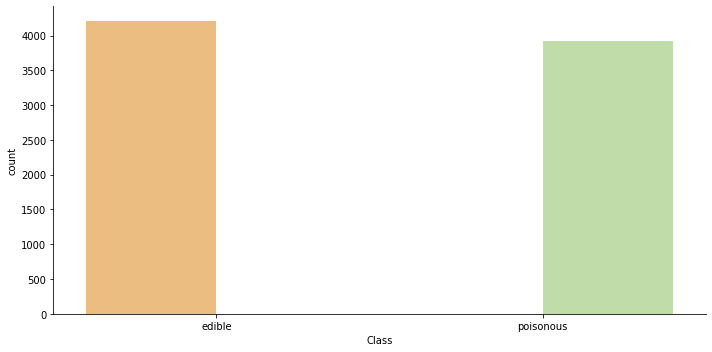

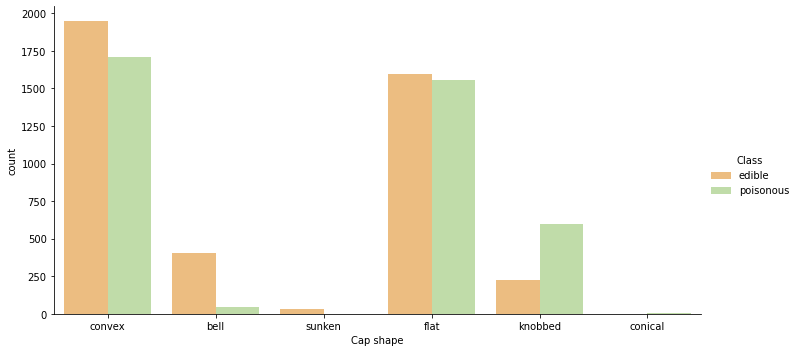

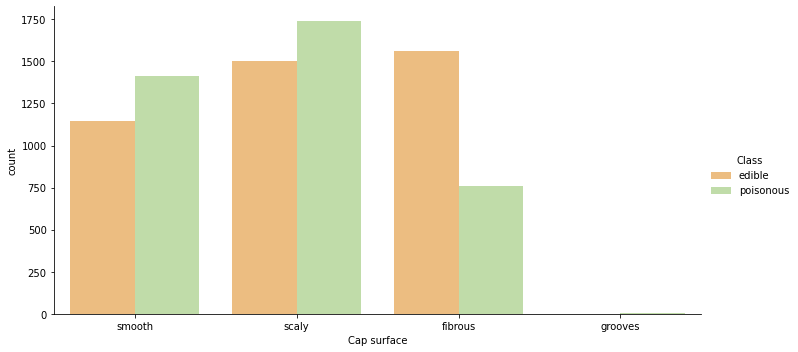

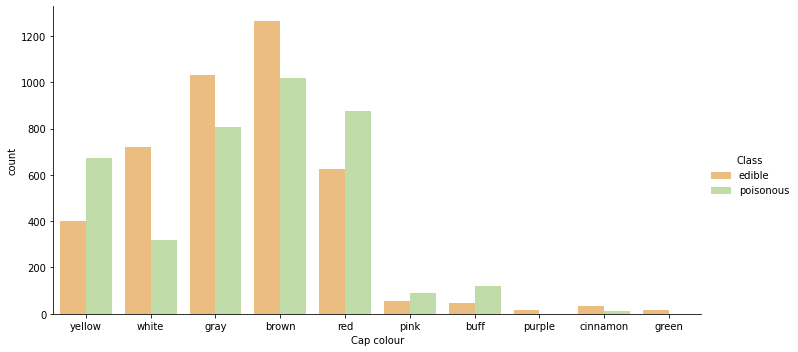

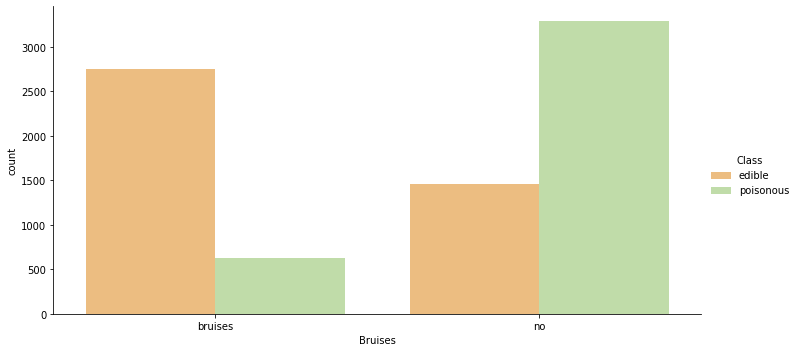

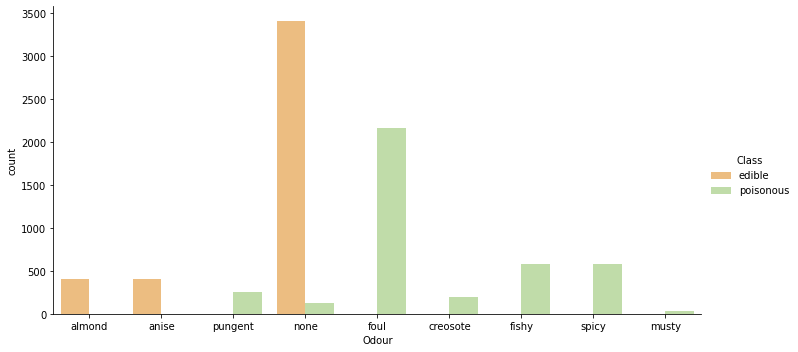

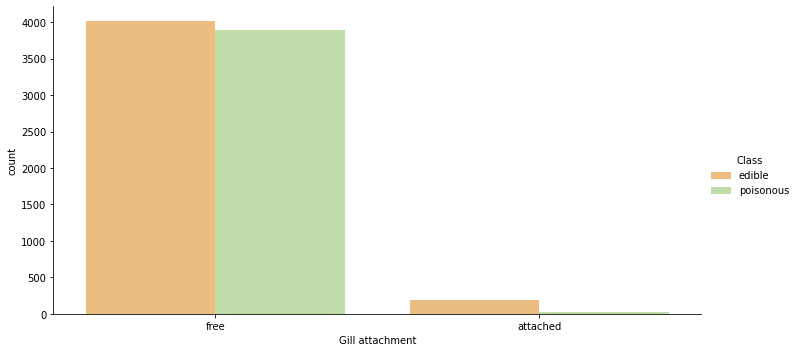

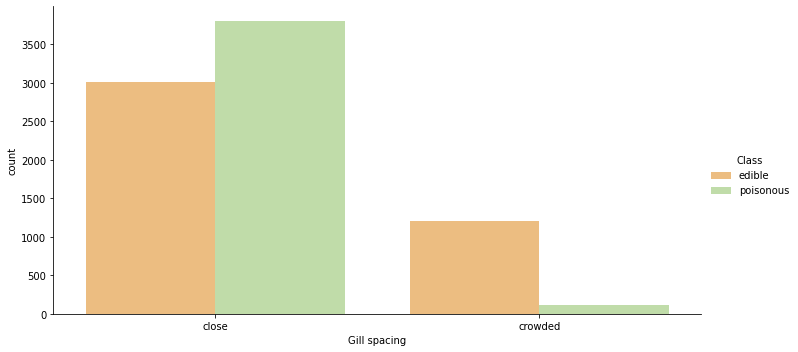

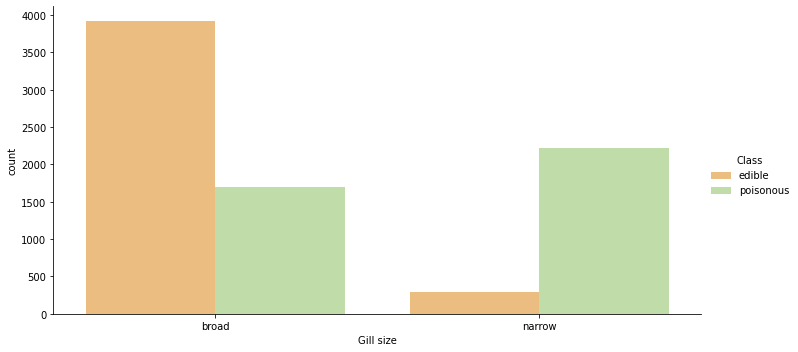

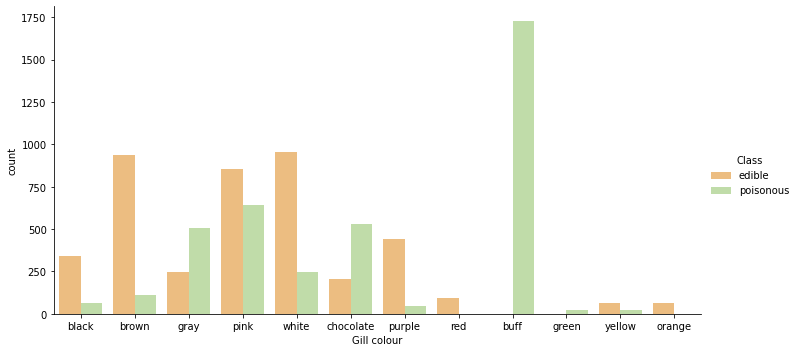

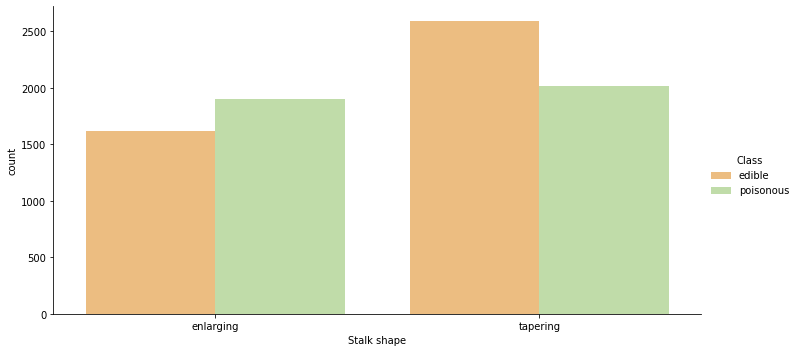

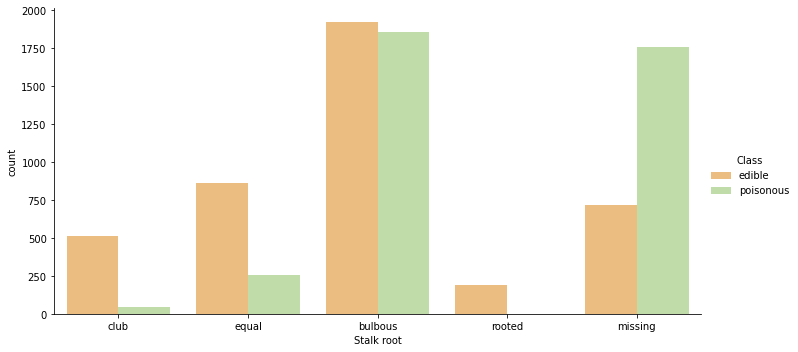

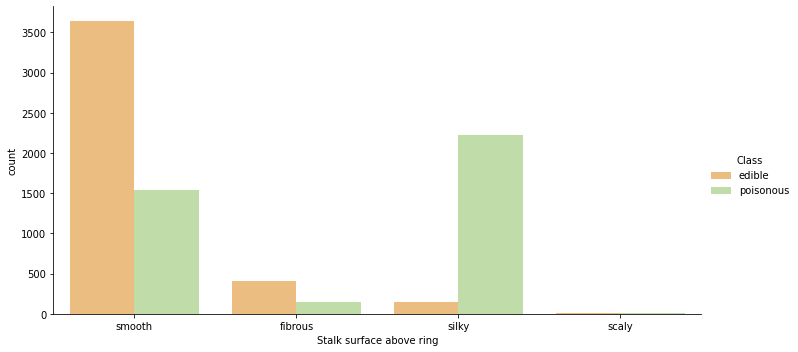

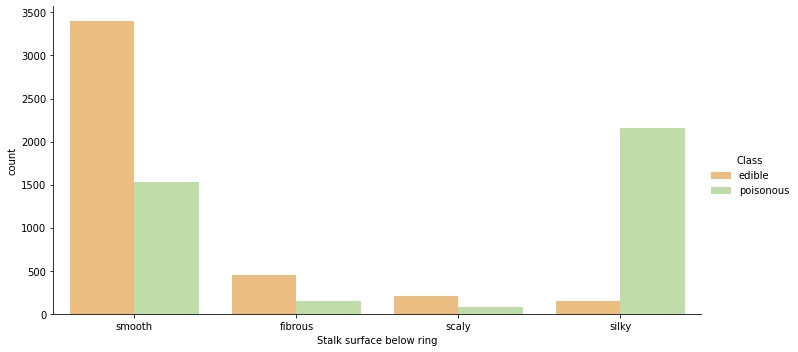

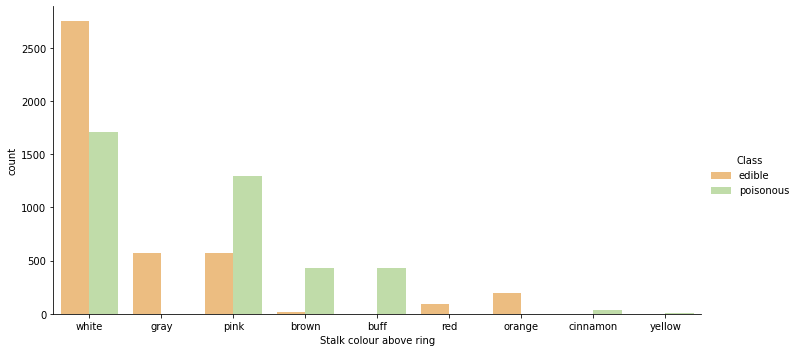

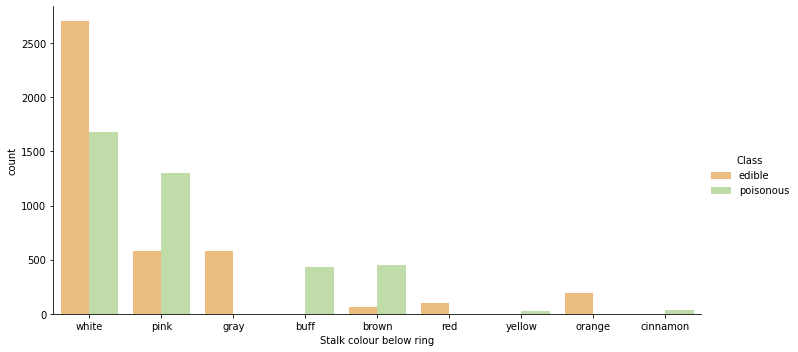

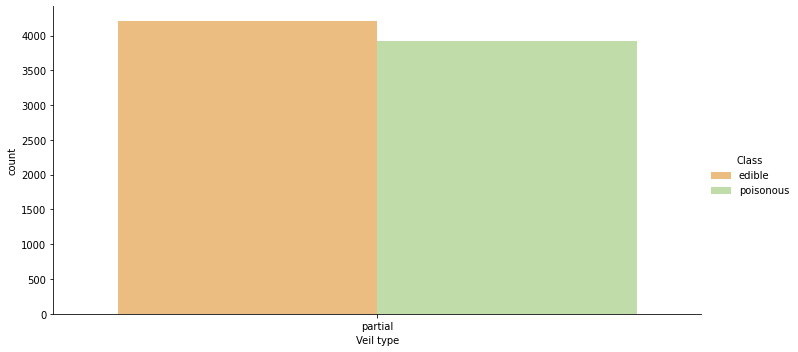

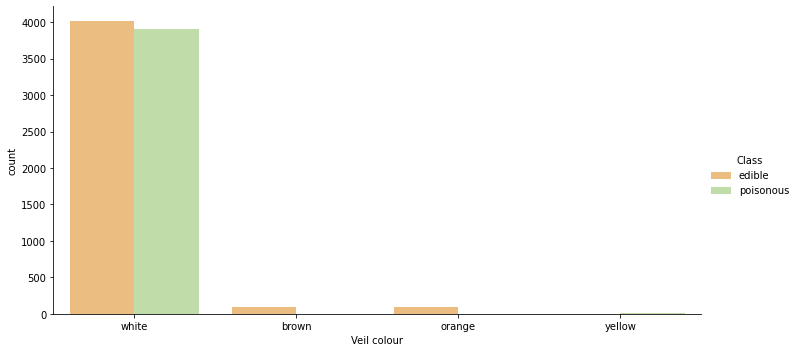

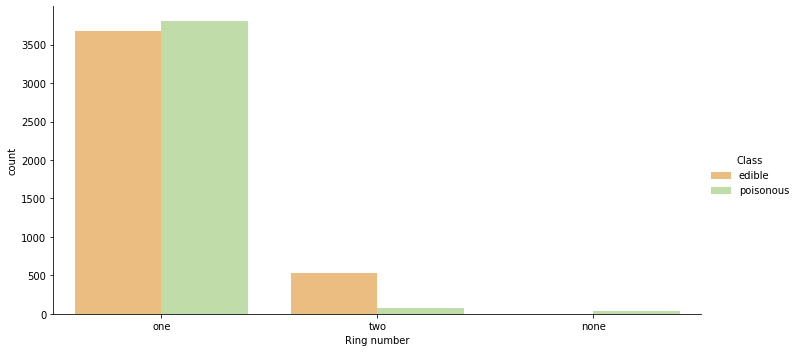

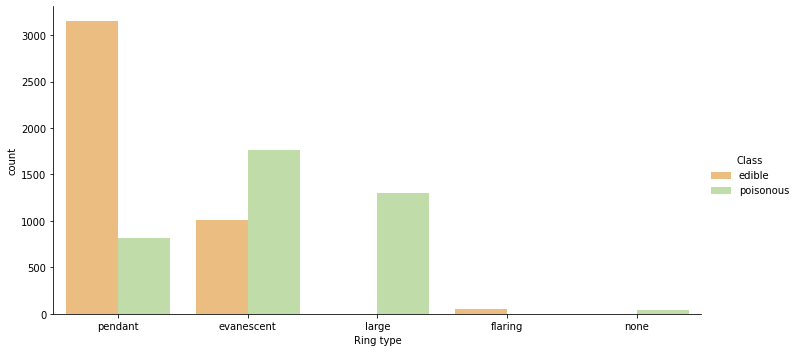

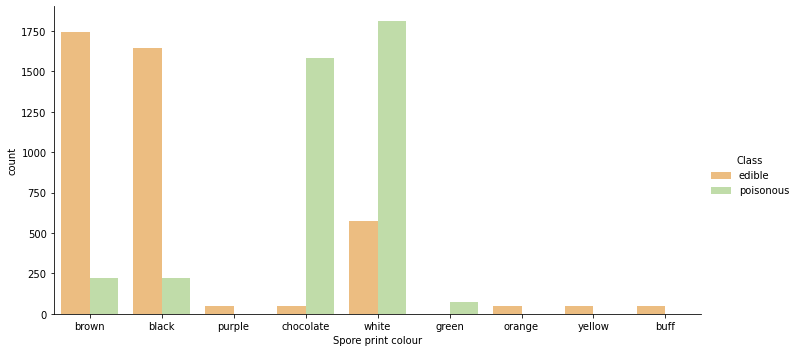

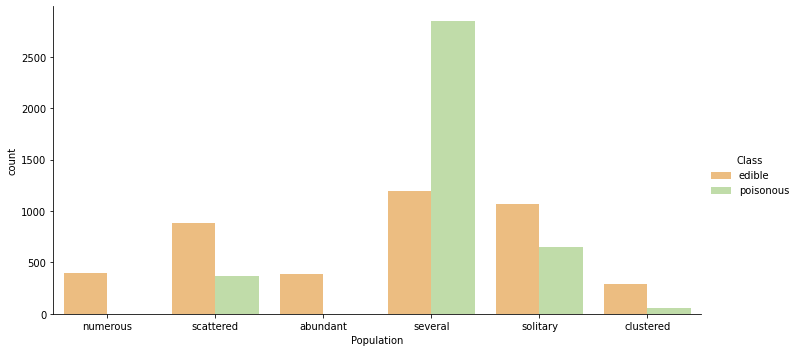

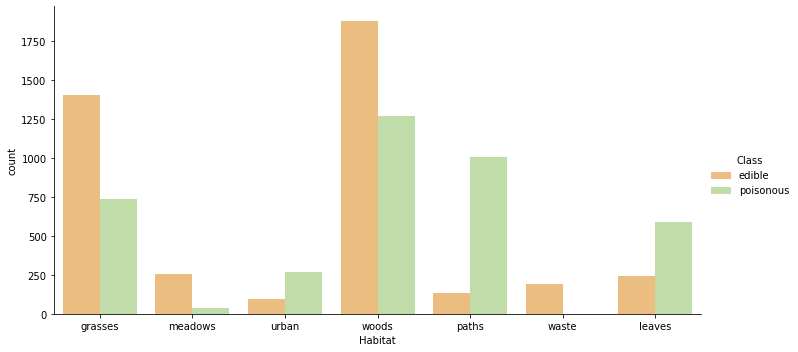

In [ ]:
# Displaying the categorical values as scatter plots for initial visualisation
for col in df.columns:
    sns.catplot(x=col, hue='Class', data=df, kind='count', height=5, aspect=2, palette="Spectral")
    plt.show()


## 3.5 Findings and Considerations

The data shows that the `Stalk root` column's missing values are biased towards 'poisonous'.  

I considered removing those rows, but it would have ended up taking out 30.53% of the dataset (2480 out of 8123).

Another considered approach was replacing the missing values with the most frequent value (bulbous) but that was not the best way to go, as it would have introduced further biases.

This should be looked at more in depth. However, because of time constraints, I decided to leave the column as my tests have revealed that dropping it causes a slight drop in accuracy score for the Decision Tree (5.2), which can be regained (99.x%) by going one level deeper in the tree. this 

# 4. Data Pre-Processing
---

## 4.1 Data Cleaning
During the data visualisation it was evident that the "Veil type" column has the same value for any kind of mushroom (regardless of edible or poisonous), and since it does not affect the training of the model, it will be removed to improve its efficiency.

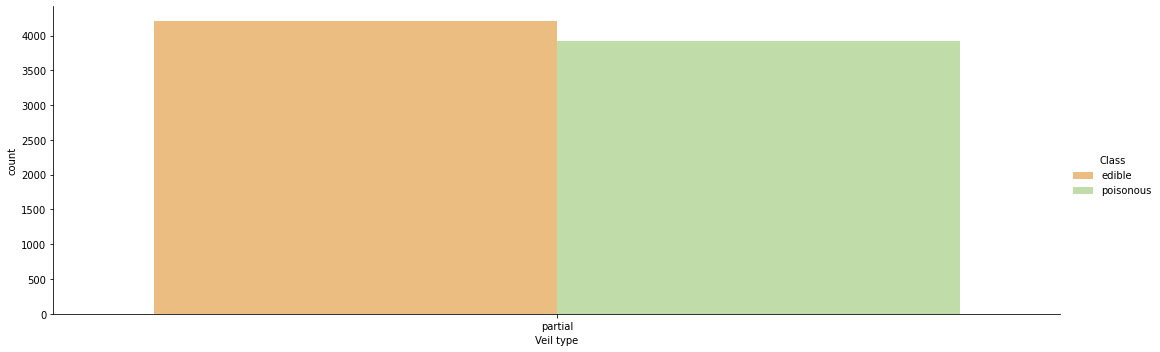

In [ ]:
sns.catplot(x='Veil type', hue='Class', data=df, kind='count', height=5, aspect=3, palette="Spectral")

In [ ]:
# Creates a copy of the dataframe to work with
dfC = df.copy()

# Drop Veil type column
dfC = dfC.drop(columns=['Veil type'])
#dfC = dfC.drop(columns=['Stalk root']) # Should be dealt with more appropriately, not dropped.
# Since this value has a high feature importance score () towards the dataset's training, dropping it decreases the model's accuracy.

## 4.2 Handling Categorical Values
Because this dataset only contains categorical nominal values, each one needs to be encoded in numerical form so that the model can be created and trained in a simpler and more efficient manner.

According to the sklearn documentation, a LabelEncoder can be used to encode target values (`y`) but not the input `X`, as doing so would introduce a new problem:

Since each value is transformed into a specific number, the trained model might draw conclusions about the correlation between that number and the rest of the data, as you are creating a certain ordinality (it does not apply if you only have two unique values).

To avoid this issue, it will be wise to encode the target data and columns with two unique values with a `Label Encoder`.

The rest of the values will be encoded with a `One Hot Encoder`, as it is the conventional way to work with categorical data with several unique values, and  can be achieved using he pandas get_dummies() function.

This particular method takes creates a binary feature for each category, setting the value to 1 when that particular instance contains the value.

## 4.3 Visualise columns with two values

In [ ]:
# Creates a list of all the columns that only have two unique values
cols = []

for col in dfC.columns:
  if len(dfC[col].unique()) == 2:
    cols.append(col)

cols

['Class',
 'Bruises',
 'Gill attachment',
 'Gill spacing',
 'Gill size',
 'Stalk shape']

## 4.4 Encode target and columns with two unique values with Label Encoder

In [ ]:
# Encodes all the columns that have two unique values to 0s and 1s with the Label Encoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in dfC.columns:
  if len(dfC[col].unique()) == 2:
    dfC[col] = label_encoder.fit_transform(dfC[col])

dfC

,Class,Cap shape,Cap surface,Cap colour,Bruises,Odour,Gill attachment,Gill spacing,Gill size,Gill colour,...,Stalk surface above ring,Stalk surface below ring,Stalk colour above ring,Stalk colour below ring,Veil colour,Ring number,Ring type,Spore print colour,Population,Habitat
0,0,convex,smooth,yellow,0,almond,1,0,0,black,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,grasses
1,0,bell,smooth,white,0,anise,1,0,0,brown,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,meadows
2,1,convex,scaly,white,0,pungent,1,0,1,brown,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
3,0,convex,smooth,gray,1,none,1,1,0,black,...,smooth,smooth,white,white,white,one,evanescent,brown,abundant,grasses
4,0,convex,scaly,yellow,0,almond,1,0,0,brown,...,smooth,smooth,white,white,white,one,pendant,black,numerous,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,knobbed,smooth,brown,1,none,0,0,0,yellow,...,smooth,smooth,orange,orange,orange,one,pendant,buff,clustered,leaves
8119,0,convex,smooth,brown,1,none,0,0,0,yellow,...,smooth,smooth,orange,orange,brown,one,pendant,buff,several,leaves
8120,0,flat,smooth,brown,1,none,0,0,0,brown,...,smooth,smooth,orange,orange,orange,one,pendant,buff,clustered,leaves
8121,1,knobbed,scaly,brown,1,fishy,1,0,1,buff,...,smooth,silky,white,white,white,one,evanescent,white,several,leaves


## 4.5 Encode columns with more than two unique values with One Hot Encoder

In [ ]:
# Takes all the columns with more than two unique values and one hot encode them with a One Hot encoder
for col in dfC.columns:
  if len(dfC[col].unique()) > 2:
    dfC = pd.get_dummies(dfC, columns=[col], drop_first=True)

dfC

,Class,Bruises,Gill attachment,Gill spacing,Gill size,Stalk shape,Cap shape_conical,Cap shape_convex,Cap shape_flat,Cap shape_knobbed,...,Population_numerous,Population_scattered,Population_several,Population_solitary,Habitat_leaves,Habitat_meadows,Habitat_paths,Habitat_urban,Habitat_waste,Habitat_woods
0,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,1,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,1,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8119,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
8120,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
8121,1,1,1,0,1,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
# Initialising X and y
y = dfC['Class'] # Take Class as y (target)
X = dfC.drop('Class', axis=1) # Take the rest as X

X

,Bruises,Gill attachment,Gill spacing,Gill size,Stalk shape,Cap shape_conical,Cap shape_convex,Cap shape_flat,Cap shape_knobbed,Cap shape_sunken,...,Population_numerous,Population_scattered,Population_several,Population_solitary,Habitat_leaves,Habitat_meadows,Habitat_paths,Habitat_urban,Habitat_waste,Habitat_woods
0,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
8119,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8121,1,1,0,1,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
# Splitting testing and training data, 0.8/0.2 respectively
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train

,Bruises,Gill attachment,Gill spacing,Gill size,Stalk shape,Cap shape_conical,Cap shape_convex,Cap shape_flat,Cap shape_knobbed,Cap shape_sunken,...,Population_numerous,Population_scattered,Population_several,Population_solitary,Habitat_leaves,Habitat_meadows,Habitat_paths,Habitat_urban,Habitat_waste,Habitat_woods
7434,1,1,0,1,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
7724,1,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
783,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1928,1,1,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
7466,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,1,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3264,1,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1653,1,1,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2607,0,1,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


## 4.6 Data Normalisation
Normalising the data so that the averages with 0 are removed.

In [ ]:
from sklearn import preprocessing
normalized_X_train = preprocessing.normalize(X_train)
normalized_X_test = preprocessing.normalize(X_test)

X_train

,Bruises,Gill attachment,Gill spacing,Gill size,Stalk shape,Cap shape_conical,Cap shape_convex,Cap shape_flat,Cap shape_knobbed,Cap shape_sunken,...,Population_numerous,Population_scattered,Population_several,Population_solitary,Habitat_leaves,Habitat_meadows,Habitat_paths,Habitat_urban,Habitat_waste,Habitat_woods
7434,1,1,0,1,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
7724,1,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
783,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1928,1,1,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
7466,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,1,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3264,1,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1653,1,1,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2607,0,1,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


## 4.7 Lazypredict tests
Secondary tests to support my hypotheses (commented out). These results were non-conclusive, as most algorithms in the function return as 1.00 in this case.

In [ ]:
!pip install lazypredict

from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

#clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
#models,predictions = clf.fit(X_train, X_test, y_train, y_test)
#
#print(models)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 5. Training Models and Results
---
In this section are the actual implementations of the mome

## 5.1 - Logistic Regression Model
The Logistic Regression Model is the one that has given the most worries about it being overfitting. Various tests indicate that the result is not always 100%, but the prediction score is always above 99.0%.

In [ ]:
from sklearn.linear_model import LogisticRegression
# Initialise LR
logistic_model = LogisticRegression(solver='lbfgs',class_weight='balanced',max_iter=3000, random_state=10) # Random state 10 for replicability
logistic_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=3000, random_state=10)

In [ ]:
# Predicted values
y_pred = logistic_model.predict(X_test)
# Actual values
actual = y_test

In [ ]:
dic = {'Actual':actual,
'Prediction':y_pred,
'correct_prediction': 0
}
result = pd.DataFrame(dic)

# update the correct_prediction values to yes, if correct prediction
def myfunc(x, y):
  if x == y:
    return "yes"
  else:
    return "no"

result['correct_prediction'] = result.apply(lambda x: myfunc(x['Actual'], x['Prediction']), axis=1)

result

,Actual,Prediction,correct_prediction
380,0,0,yes
3641,0,0,yes
273,0,0,yes
1029,0,0,yes
684,0,0,yes
...,...,...,...
3535,1,1,yes
1643,0,0,yes
6494,1,1,yes
6,0,0,yes


In [ ]:
# Results of incorrect predictions
result[result.correct_prediction == "no"]

,Actual,Prediction,correct_prediction
5236,1,0,no


### 5.1.1 Results

In [ ]:
print(f'Model Accuracy on Test Data is {len(result[result.correct_prediction=="yes"])/len(round(result * 100, 2))}')

Model Accuracy on Test Data is 0.9993846153846154


In [ ]:
from sklearn.metrics import accuracy_score
print(f'The Model Accuracy on Testing Set is {round(accuracy_score(y_test, y_pred), 2)}')

The Model Accuracy on Testing Set is 1.0


In [ ]:
# See a classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       838
           1       1.00      1.00      1.00       787

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
# Confusion matrix of results 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[838   0]
 [  1 786]]


(0.0, 2.0)

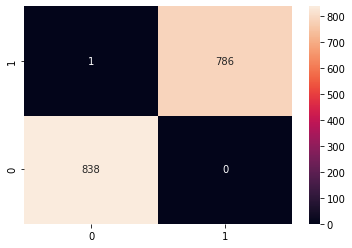

In [ ]:
# Heatmap of Logistic Regression
ax = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")
ax.set_ylim([0,2])

### 5.1.2 Save LR Model pkl

In [ ]:
### Save the Logistic Regression model
import pickle
# Save to file in the current working directory
pkl_filename = "logistic_regression_model.pkl"
# save your model that was created above (logistic_model)
with open(pkl_filename, 'wb') as file:
  pickle.dump(logistic_model, file)

Load the model from the files and predict X_test again

In [ ]:
# Load from file
with open(pkl_filename, 'rb') as file:
  pickle_model = pickle.load(file)
# Lets test the mode loaded from a file and check results
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
y_hat = pickle_model.predict(X_test)

Test score: 99.94 %


## 5.2 - Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialise a Tree Model Classifier
tree_model = DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
# Fit the training data into the model
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
# Make a prediction
predictions = tree_model.predict(X_test)
predictions

array([0, 0, 1, ..., 1, 0, 0])

### 5.2.1 First Result

In [ ]:
# Get the model's accuracy
accuracy = tree_model.score(X_test, y_test)
print(f'The Model Accuracy is {round(accuracy * 100, 2)}%')

The Model Accuracy is 96.0%


In [ ]:
# We can manually try various values:
max_depth_vals = list(range(1, 10))
# We need a list to store the accuracy for each model with different max depth
# List to store the average RMSE for each value of max_depth:
accuracy_list = []
# Try different max depth values above
for max_depth in max_depth_vals:
# create the model with specific max depth
  tree_model = DecisionTreeClassifier(max_depth = max_depth, random_state = 10) # Random state 10 for replicability
  # fit the data
  tree_model.fit(X_train, y_train)
  # get accuracy and store it in the list accuracy
  accuracy = tree_model.score(X_test, y_test)
  accuracy_list.append(accuracy)

In [ ]:
print(accuracy_list)

[0.8849230769230769, 0.96, 0.9907692307692307, 0.9950769230769231, 0.9975384615384615, 0.9975384615384615, 1.0, 1.0, 1.0]


In [ ]:
# create list of tuples (pairs of depth and accuracy)
depth_accuracies = list(zip(max_depth_vals,accuracy_list))
# create a data frame
results = pd.DataFrame(data=depth_accuracies, columns=['max_depth','accuracy'])
results

,max_depth,accuracy
0,1,0.88
1,2,0.96
2,3,0.99
3,4,1.00
4,5,1.00
5,6,1.00
6,7,1.00
7,8,1.00
8,9,1.00


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Tree Depth')]

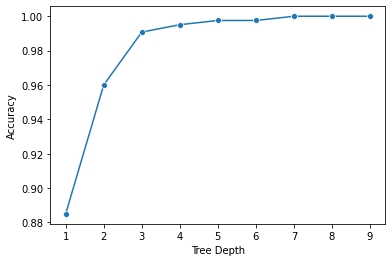

In [ ]:
ax = sns.lineplot(x="max_depth", y="accuracy", data=results, marker="o")
ax.set(xlabel='Tree Depth', ylabel='Accuracy')

### 5.2.2 Features Importance Score
Visualising which features are the ones that affect the model training the most.

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(tree_model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
27,Odour_none,0.62
41,Stalk root_club,0.17
44,Stalk root_rooted,0.09
79,Spore print colour_green,0.03
81,Spore print colour_purple,0.03
...,...,...
34,Gill colour_green,0.00
33,Gill colour_gray,0.00
32,Gill colour_chocolate,0.00
31,Gill colour_buff,0.00


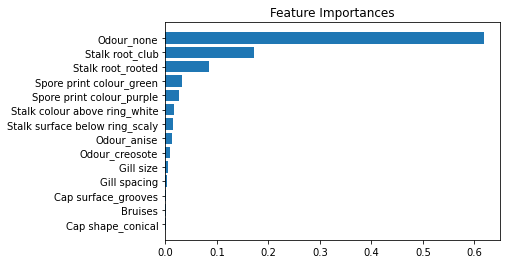

In [ ]:
# Visualises all the features that affect the model training the most
fig, ax = plt.subplots()
ax.barh(importances[importances['importance'] > 0]['feature'], importances[importances['importance'] > 0]['importance'])
ax.set_title('Feature Importances')
ax.invert_yaxis()
plt.show()

The mushrooms with no odour seem to be most impactful value to the model overall:

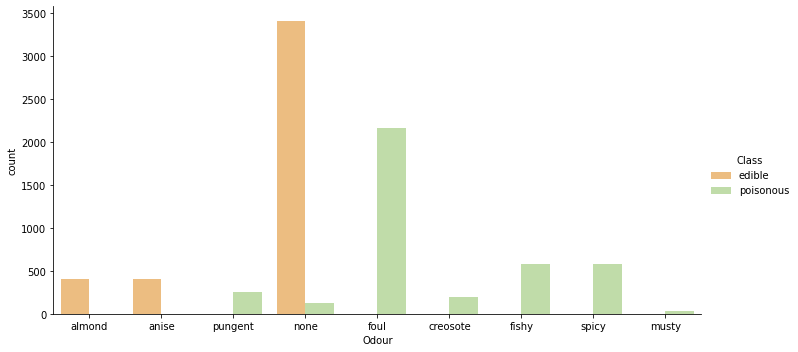

In [ ]:
sns.catplot(x="Odour", hue='Class', data=df, kind='count', height=5, aspect=2, palette="Spectral")
plt.show()

### 5.2.3 Solution improvement (hyperparameters tuning)
The results show that the Decision Tree settings can still be tweaked to be improved. The easiest solution that seems to have the most immediate effects would be to change the tree's depth from 2 to 4. Going beyond 4 would mean always having 100% accuracy, which would be overfitting.

In [ ]:
# Creating a new model with the best parameters
tree_model = DecisionTreeClassifier(max_depth = 4, random_state = 10) # Random state 10 for replicability

# Fit the data in the model
tree_model.fit(X_train, y_train)

# Get the model's accuracy
accuracy = tree_model.score(X_test, y_test)
print(f'The Improved Model\'s Accuracy is {round(accuracy * 100, 2)}%')

The Improved Model's Accuracy is 99.51%


### 5.2.4 Tree Visualisation
Visualising the tree model that was just trained in the previous section.

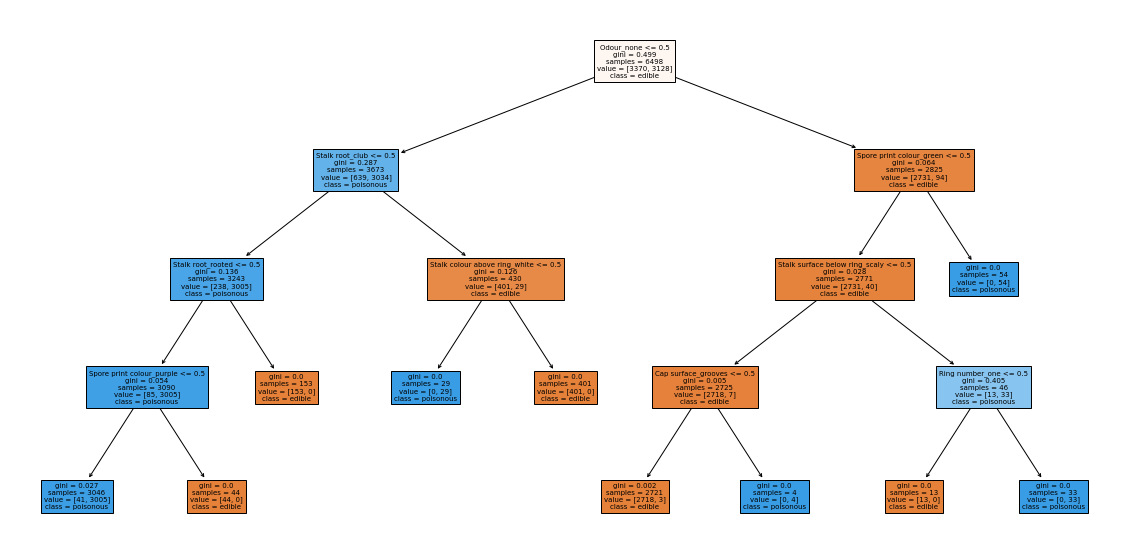

In [ ]:
# Visualising Decision Tree
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(tree_model, feature_names=X.columns, class_names=['edible', 'poisonous'], filled=True)
plt.show()

### 5.2.5 Save DT Model pkl

In [ ]:
# Save the Decision Tree model
import pickle
# Save to file in the current working directory
pkl_filename = "decision_tree_model.pkl"
# Save your model that was created above (decision_tree_model)
with open(pkl_filename, 'wb') as file:
  pickle.dump(tree_model, file)

## 5.3 - Random Forest Model
I decided to also use a Random Forest Model as it is notoriously less prone to overfitting than the Decision Tree Model alone or Linear Regression, especially with a dataset that mostly contains categorical variables.

In [ ]:
# Random Forest import and Model creation
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(max_depth = 5)

# Training the model
random_forest_model.fit(X_train, y_train)

# Scoring the model
random_forest_model.score(X_train, y_train)

# Model score
random_forest_model.score(X_test, y_test)

0.9883076923076923

### 5.3.1 Tree visualisation

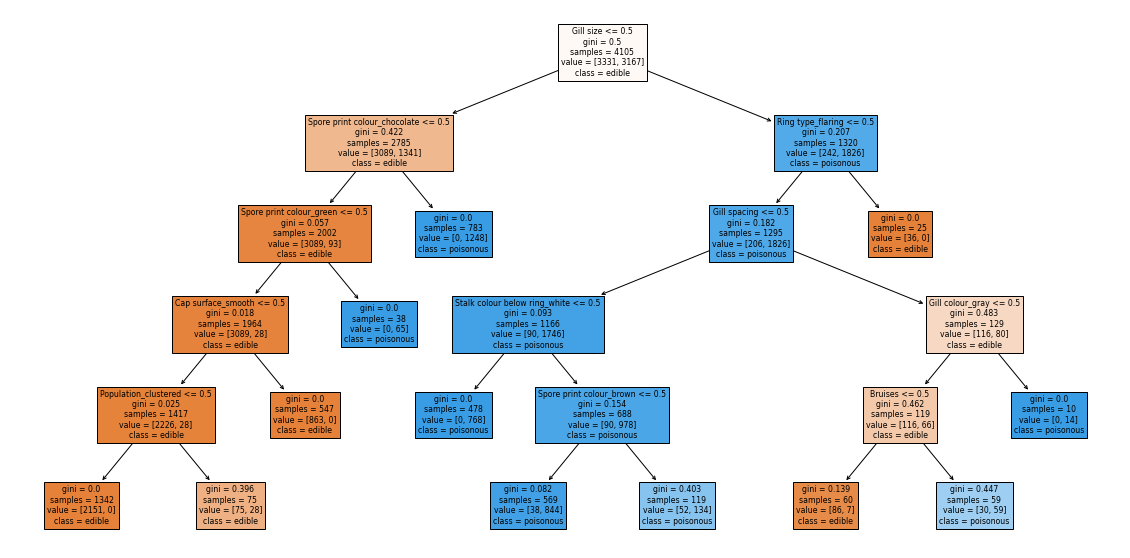

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(random_forest_model.estimators_[0], feature_names=X.columns, class_names=['edible', 'poisonous'], filled=True)
plt.show()

### 5.3.2 Result

In [ ]:
from sklearn.metrics import accuracy_score
results = random_forest_model.predict(X_test)
accuracy_score(y_test, results)

# Get the model's accuracy
accuracy = tree_model.score(X_test, y_test)
print(f'The Model\'s Accuracy is {round(accuracy * 100, 2)}%')

The Model's Accuracy is 99.51%


### 5.3.3 Save RF Model pkl

In [ ]:
# Save the Random Forest model
import pickle
# Save to file in the current working directory
pkl_filename = "random_forest_model.pkl"
# Save your model that was created above (random_forest_model)
with open(pkl_filename, 'wb') as file:
  pickle.dump(random_forest_model, file)